# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [30]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error, r2_score
import math
from math import sqrt

os.getcwd()

'C:\\Users\\nmur1\\Google Drive\\Springboard\\Guided Capstone\\data'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [31]:
#import the data csv

path = r'C:\Users\nmur1\Google Drive\Springboard\Guided Capstone\data'
os.chdir(path)
df = pd.read_csv('step2_output.csv')
df.head()
df.drop(columns = "Unnamed: 0", inplace = True)

df.shape

(331, 27)

In [32]:
#apply kmeans clustering

from sklearn.cluster import KMeans
x = df.drop(['Name','state', 'Region'], axis =1)


#set sead for cluster
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)

df['cluster'] = y_kmeans3
df.head()
df.to_clipboard()

In [33]:
df = df.drop(columns = ['Region'])

In [34]:
#write a function to get my dummy variables 

def dummy(df, exclude):
    
    objects = df.select_dtypes(include=['object'])
    
    for col in objects.columns:
    
        if col not in exclude:
    
            df_dummy = df[[col]]
            df = pd.concat([df.drop(df_dummy, axis = 1), pd.get_dummies(df_dummy)], axis =1)

    return df

#### Scale, Split, Train Model

In [35]:
#convert X and Y axises for modeling
X = df.drop(['Name', 'state', 'AdultWeekend'], axis = 1)
y = df['AdultWeekend'].ravel()
    
#scale X
scaler = preprocessing.StandardScaler().fit(X)
X_scaled =  scaler.transform(X)
        
 #split train
X_train, X_test, y_train, y_test = \
            train_test_split(X_scaled, y, test_size =.25, random_state = 1)
        
        
#prediction and intercepts
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = model.predict(X_test)
inter = lm.intercept_
        
#error scoring
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



#### Print Coefficients

In [36]:
coef = np.round(lm.coef_,2)
dfCoef = pd.DataFrame(abs(coef), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending = False)
dfComp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, columns = ['Actual','Predicted'])
dfCoef

,Coefficient
AdultWeekday,20.00
summit_elev,14.75
base_elev,11.51
vertical_drop,5.00
averageSnowfall,1.64
quad,1.57
triple,1.38
surface,1.18
daysOpenLastYear,0.83
Runs,0.83


#### Print Error Scores

In [72]:
errorscore = pd.DataFrame({'Metric': ['RMSE', 'MAE', 'EVS'], 'Score':[rmse, mae, evs]}, index = range(0,3))
errorscore.Score =errorscore.Score.apply(lambda x: round(x,2))
errorscore

,Metric,Score
0,RMSE,7.59
1,MAE,5.72
2,EVS,0.91


In [9]:
dfCoef.index

Index(['AdultWeekday', 'summit_elev', 'base_elev', 'vertical_drop',
       'averageSnowfall', 'quad', 'triple', 'surface', 'daysOpenLastYear',
       'Runs', 'cluster', 'total_chairs', 'fastQuads', 'trams',
       'NightSkiing_ac', 'double', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'yearsOpen', 'fastSixes', 'Snow Making_ac',
       'fastEight', 'projectedDaysOpen'],
      dtype='object')

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [10]:
#Filter Big Mountain Dataset
BM = df[df['Name'].str.contains('Big Mountain')]


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [11]:
#Scale Big Mountain to pass into moadel
BM_scaled=scaler.transform(df[df['Name'].str.contains('Big Mountain')].drop(['Name','AdultWeekend','state'], axis=1)) 
BM_scaled

array([[ 0.59536214,  1.1975376 ,  0.34961841, -0.30842819, -0.05504819,
        -0.28361358,  0.90042166,  0.81204778,  2.74731618, -1.00853226,
         0.1839015 ,  0.98727357,  1.22946297,  0.76496022,  1.62054443,
         1.24725663,  1.79031002,  0.24496056,  0.07636063,  1.10482918,
         0.96450835,  0.10252811,  5.53460268, -1.52473901]])

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [12]:
#Predict model
y_pred = model.predict(BM_scaled)
round(y_pred[0],2)

88.39

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [13]:
print('Suggested Price: ' + str(round(y_pred[0],2)))

Suggested Price: 88.39


In [14]:
SuggestedPrice = df[df['Name'].str.contains('Big Mountain')]
SuggestedPrice.loc[330,'AdultWeekend'] = y_pred
#SuggestedPrice.loc[330,'AdultWeekend'] = y_pred

C:\Users\nmur1\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

Text(0.5, 1.0, 'summit_elev by vertical_drop by cluster')

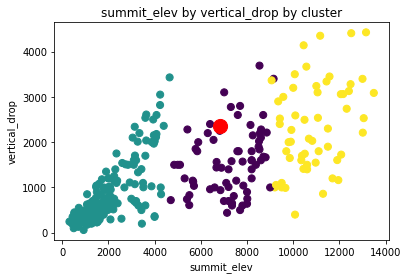

In [15]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c = df['cluster'], s=50, cmap='viridis', label ='cluster')
plt.scatter(BM['summit_elev'], BM['vertical_drop'], c='red', s=200)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
#plt.savefig('figures/fig1.png',bbox_inches='tight')

# Pricing Reccomendations, Graph Interpretations, and Model Assumptions


* Our pricing model performed a competitive pricing analysis of 330 ski resorts and took 27 key resort attributes into account to assess the feasibility of increasing Big Mountain Resort's lift tickets.
<br><br>
* The model concluded that the top 10 factors in price were: *AdultWeekday, summit_elev, base_elev, vertical_drop,
   averageSnowFall, quad, 'triple, surface, daysOpenLastYear, total runs*
 <br><br>     
* Based on the model assumptions, using a linear regression model, we feel that we can increase our Adult Weekend Price from \\$81 to \\$88 for the upcoming season
<br><br>
* The below graphs plot the top 3 key attributes impacting price: Number of Quat Lifts, Average Snowfall, and Summit Elevation
<br><br>
* The green dots on each plot represent the cluster that Big Mountain Resort belongs to. Three clusters were established using k means clustering.
<br><br>
* Each graph is overlayed with a large red dot, representing out current \\$81 price, and a large blue dot representing the suggested \\$88 price
<br><br>
* In each graph the suggested price respresents a reasonable increase and does not fall outside the norm for other resorts with similar attributes (x variables) or their respective "green" cluster


Text(0.5, 1.0, 'AdultWeekend by Quad Lifts by cluster')

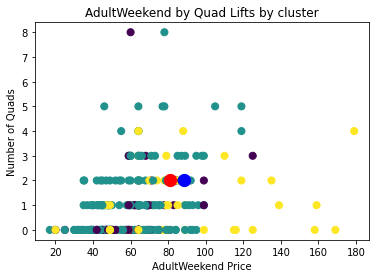

In [16]:
plt.scatter(df['AdultWeekend'], df['quad'], c = df['cluster'], s=50, cmap='viridis', label ='cluster')
plt.scatter(BM['AdultWeekend'], BM['quad'], c='red', s=150)
plt.scatter(SuggestedPrice['AdultWeekend'], SuggestedPrice['quad'], c='blue', s=150)
plt.xlabel('AdultWeekend Price')
plt.ylabel('Number of Quads')
plt.title('AdultWeekend by Quad Lifts by cluster')

Text(0.5, 1.0, 'Adult Weekend by Average Snowfall by cluster')

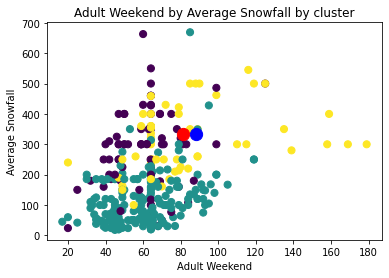

In [17]:
plt.scatter(df['AdultWeekend'], df['averageSnowfall'], c = df['cluster'], s=50, cmap='viridis', label ='cluster')
plt.xlabel('Adult Weekend')
plt.scatter(BM['AdultWeekend'], BM['averageSnowfall'], c = 'red', s = 150)
plt.scatter(SuggestedPrice['AdultWeekend'], SuggestedPrice['averageSnowfall'], c='blue', s=150)
plt.ylabel('Average Snowfall')
plt.title('Adult Weekend by Average Snowfall by cluster')

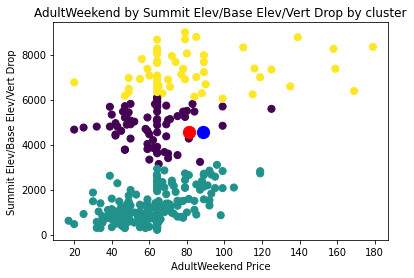

In [23]:
import seaborn as sns

sns.set
_ = plt.scatter(df['AdultWeekend'], (df['summit_elev'] + df['vertical_drop'] + df['base_elev'])/3, c = df['cluster'], s=50, cmap='viridis', label ='cluster')
_ = plt.scatter(BM['AdultWeekend'],(BM['summit_elev'] + BM['vertical_drop'] + BM['base_elev'])/3, c='red', s=150)
_ = plt.scatter(SuggestedPrice['AdultWeekend'], (SuggestedPrice['summit_elev'] + SuggestedPrice['vertical_drop'] + 
                                                 SuggestedPrice['base_elev'])/3, c='blue', s=150)
_ = plt.xlabel('AdultWeekend Price')
_ = plt.ylabel('Summit Elev/Base Elev/Vert Drop')
_ = plt.title('AdultWeekend by Summit Elev/Base Elev/Vert Drop by cluster')

plt.show()

In [18]:
BM['AdultWeekday']

330    81.0
Name: AdultWeekday, dtype: float64

# Adult Weekday Prices

* Based on the graph below, Adult Weekend Prices and Adult Weekday prices represent a postive linear 1:1 relationship in most cases. 

* The majority of Cluster 2 Resorts (Big Mountain Resort's Cluster) have no difference between Weekday and Weekend prices. Therefore our reccomendation is to increase weekday prices from \\$81 to the newly proposed \\$88 weekend price



Text(0.5, 1.0, 'AdultWeekend by AdultWeekday by cluster')

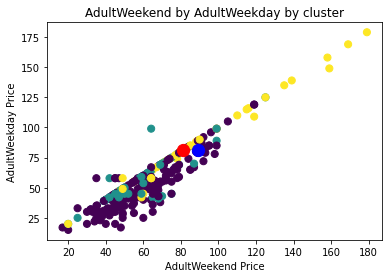

In [19]:
plt.scatter(df['AdultWeekend'], df['AdultWeekday'],c = df['cluster'], s=50, cmap='viridis', label ='cluster')
plt.scatter(BM['AdultWeekend'], BM['AdultWeekday'], c='red', s=150)
plt.scatter(SuggestedPrice['AdultWeekend'], SuggestedPrice['AdultWeekday'], c='Blue', s=150)
plt.xlabel('AdultWeekend Price')
plt.ylabel('AdultWeekday Price')
plt.title('AdultWeekend by AdultWeekday by cluster')

,AdultWeekend,AdultWeekday,cluster,Change
count,56.000000,56.000000,56.0,56.000000
mean,82.491110,79.976273,2.0,0.043138
std,32.493869,33.357715,0.0,0.083661
min,20.000000,20.000000,2.0,-0.153961
25%,64.166810,57.916957,2.0,0.000000
50%,71.500000,71.500000,2.0,0.000000
75%,89.000000,89.000000,2.0,0.107911
max,179.000000,179.000000,2.0,0.404762


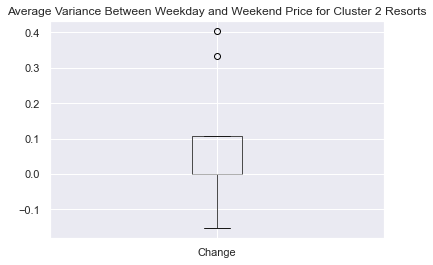

In [77]:
sns.set()
Prices = df.loc[:,('Name','AdultWeekend','AdultWeekday', 'cluster')]
Prices['Change'] = (Prices.AdultWeekend - Prices.AdultWeekday) / Prices.AdultWeekday
Cluster2 = Prices[Prices.cluster == 2]
Cluster2[['Change']].boxplot()
plt.title('Average Variance Between Weekday and Weekend Price for Cluster 2 Resorts')
Cluster2.describe()

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [21]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
path = r'C:\Users\nmur1\Google Drive\Springboard\Guided Capstone\models'
os.chdir(path)
dump(model, 'regression_model_adultweekend.joblib') 

['regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [22]:
#Save Coefficients
dfCoef.to_csv('Big Mountain Coefficients.csv')

In [23]:
#Save Performance Metrics
Metrics = dict(title = ['rmse', 'mae', 'evs'],metrics = [rmse, mae, evs])


In [24]:
pd.DataFrame(Metrics).to_csv('Big Mountain Metrics.csv')